In [75]:
import sys
import os
import inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

In [76]:
from coco.job import Job

In [77]:
current_job = Job.from_name("nyu_depth")

state_run
phase_train


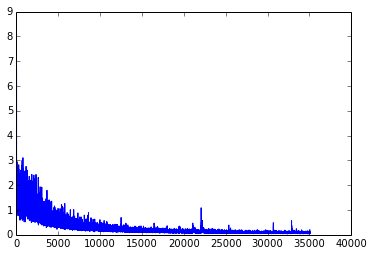

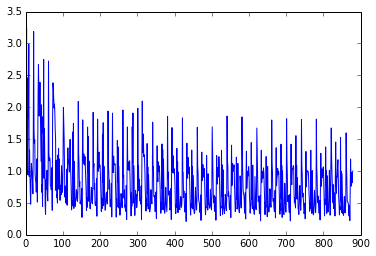

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

# Refresh job
current_job.load()
data = current_job.data

train_losses = np.array(data["train_losses"]).squeeze()
val_losses = np.array(data["val_losses"]).squeeze()

print data["state"]
print data["phase"]

plt.plot(train_losses[:])
plt.show()

plt.plot(val_losses)
plt.show()

In [82]:
w = 40

for i in range(0,len(val_losses),w):
    print np.sqrt(val_losses[i:i+w]).mean()

1.17661590667
1.0912800645
0.970026671331
0.912190775401
0.90505156592
0.890022466254
0.855996896386
0.904409917279
0.840079211766
0.845021066157
0.828137989979
0.812269208018
0.81706039399
0.825780165273
0.837661715385
0.819824254211
0.816806941423
0.817062582373
0.830850651515
0.805155115175
0.850887285884
0.78559988365


In [83]:
import h5py
f = h5py.File("/data/data/nyu_v2.hdf5")

i = np.array(f["images"][0:10])

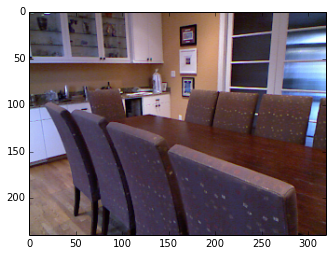

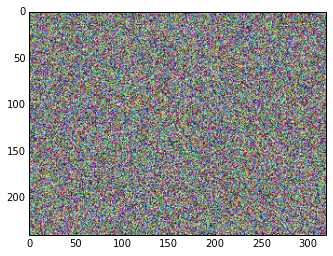

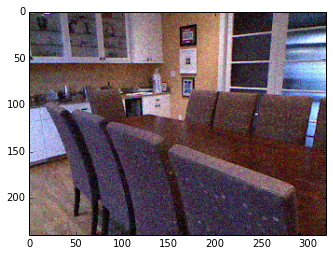

In [102]:
img = i[0]

plt.imshow(img.transpose((1,2,0)))
plt.show()

noise = np.random.normal(0, 50, size=img.shape)
plt.imshow(noise.transpose((1,2,0)))
plt.show()

noisy = img +  0.4 * noise
noisy = noisy.clip(0, 255).astype(np.uint8)
plt.imshow(noisy.transpose((1,2,0)))
plt.show()

In [177]:
from scipy.ndimage.interpolation import zoom, rotate
import math


def rot_zoom(img):
    a = np.random.randint(-10,10)
    iir = rotate(img.transpose((1,2,0)),a, order=2, reshape=False)

    rads = (abs(a) / 180.) * math.pi

    h = img.shape[1]
    w = img.shape[2]
    x = math.ceil(math.tan(rads) * (h/2.))
    y = math.ceil(math.tan(rads) * (w/2.))


    max_w = w - 2*x
    max_h = h - 2*y

    min_f = max(w/max_w, h/max_h)
    f = np.random.uniform(min_f, 1.5)
    
    n_h = int(h / f)
    n_w = int(w / f)

    upper = h - n_h - y
    cy = np.random.randint(y, upper)
    upper = w - n_w - x
    cx = np.random.randint(x, upper)
    
    
    
    iic = iir[cy:cy+n_h, cx:cx+n_w]
    
    s_y = float(h) / float(n_h)
    s_x = float(w) / float(n_w)
    
    iis = zoom(iic.transpose((2,0,1)),(1,s_y,s_x),order=2)
    

for i in range(10):
    rot_zoom(img)


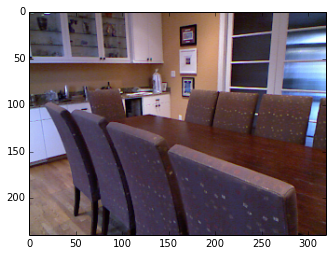

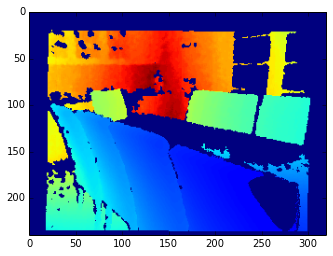

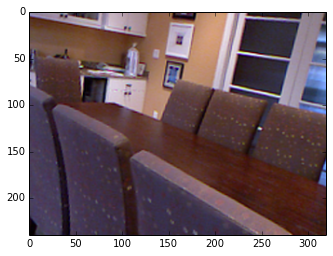

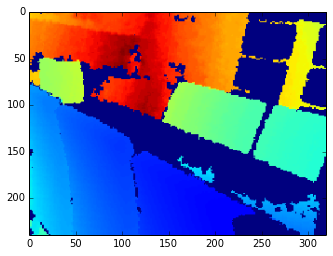

In [5]:
%matplotlib inline

import sys
import os
import inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from coco.augmentations import zoom_rot
import h5py
import numpy as np
import matplotlib.pyplot as plt
f = h5py.File("/data/data/nyu_v2.hdf5")

img = np.array(f["images"][0])
d = np.array(f["depths"][0])

plt.imshow(img.transpose((1,2,0)))
plt.show()

plt.imshow(d)
plt.show()

img, d = zoom_rot(img, d)

plt.imshow(img.transpose((1,2,0)).astype(np.uint8))
plt.show()

plt.imshow(d)
plt.show()

